In [95]:
from yatsm.yatsm import YATSM
import numpy as np

## Time

Time, the independent variable, is a list of dates that correspond to spectra, the dependent variable. These values are contrived for now until I understand exactly what type of data YATSM expects. I'm pretty sure YATSM wants an ordinal date...

In [96]:
r = np.arange(0, 1000, 16) # 16 day interval from 0 to 1000
t = np.vstack([r,r,r,r,r,r])
t[0].shape

(63,)

## Spectra

Spectra, the dependent variable, is a list of Landsat observations. The number of spectra "rows" must match the number of times. Each row contains a number of columns that correspond to measured value of each band. I'm still not sure what YATSM expects the band order to be. Let's contrive some values for each of the days we listed above.

In [97]:
# let's pretend this is some measure of from some landsat band
pretend_band_1 = np.array(map(np.sin, map(np.radians, r))) * 50 + 200
pretend_band_2 = np.array(map(np.sin, map(np.radians, r))) * 80 + 160
pretend_band_3 = np.array(map(np.sin, map(np.radians, r))) * 10 + 180
pretend_band_4 = np.array(map(np.sin, map(np.radians, r))) * 25 + 185
pretend_band_5 = np.array(map(np.sin, map(np.radians, r+10))) * 35 + 183
pretend_band_6 = np.array(map(np.sin, map(np.radians, r-10))) * 35 + 183
b = np.vstack([pretend_band_1, pretend_band_2, pretend_band_3, pretend_band_4, pretend_band_5, pretend_band_6])

## YATSM!

Now, let's try applying the YATSM algorithm to the pretend data.

In [92]:
consecutive  = 5      # (int): Consecutive observations to trigger change
threshold    = 1.0    # (float): Test statistic threshold for change
min_obs      = 16     # (int): Minimum observations in model
min_rmse     = 100    # (float): Minimum RMSE for models during testing
retrain_time = 365.25 # (float): Number of days between model fit updates during monitoring period
screening    = 'RLM' # (str): Style of prescreening of the timeseries for noise. Options are 'RLM' or 'LOWESS'

fit_indices  = np.array([0])   # (ndarray): Indices of Y to fit models for
test_indices = np.array([0])   # (ndarray): Indices of Y to test for change with
lassocv      = True

example = YATSM(X=t.T, Y=b,
                consecutive=consecutive, threshold=threshold,
                min_obs=min_obs, min_rmse=min_rmse,
                retrain_time=retrain_time, screening=screening,
                lassocv=lassocv)

example.run()
example.record

array([ (176, 560, 576, [[133.22042846679688, 53.152687072753906, 166.60806274414062, 151.61021423339844, 137.3809051513672, 136.42697143554688], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.03601936250925064, 0.0, 0.12107587605714798, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [26.564559936523438, 42.5032958984375, 5.3129119873046875, 13.282279968261719, 19.235427856445312, 18.439247131347656], 0, 0, [-0.7605286836624146, -1.2168458700180054, -0.15210573375225067, -0.3802643418312073, -0.546038031578064, -0.5025261640548706])], 
      dtype=[('start', '<i4'), ('end', '<i4'), ('break', '<i4'), ('coef', '<f4', (6, 6)), ('rmse', '<f4', (6,)), ('px', '<u2'), ('py', '<u2'), ('magnitude', '<f4', (6,))])

## Pictures

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('ggplot')

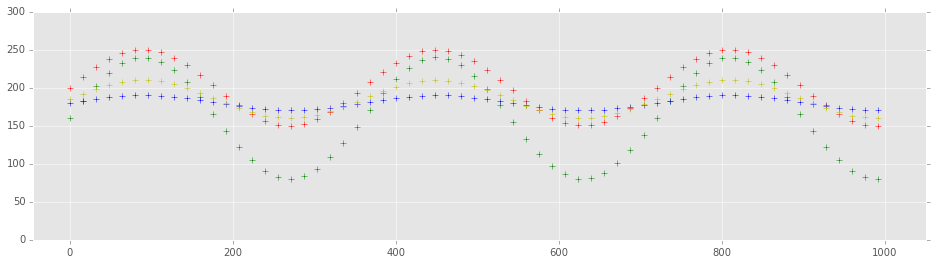

In [94]:
fg = plt.figure(figsize=(16,9), dpi=300)
a1 = fg.add_subplot(2, 1, 1, xlim=(-45,1050), ylim=(0,300) )
a1.plot(t[0], pretend_band_1, 'r+')
a1.plot(t[1], pretend_band_2, 'g+')
a1.plot(t[2], pretend_band_3, 'b+')
a1.plot(t[3], pretend_band_4, 'y+')

# a1 = fg.add_subplot(3, 2, 2, xlim =(-40,400), ylim=(100,300) )
